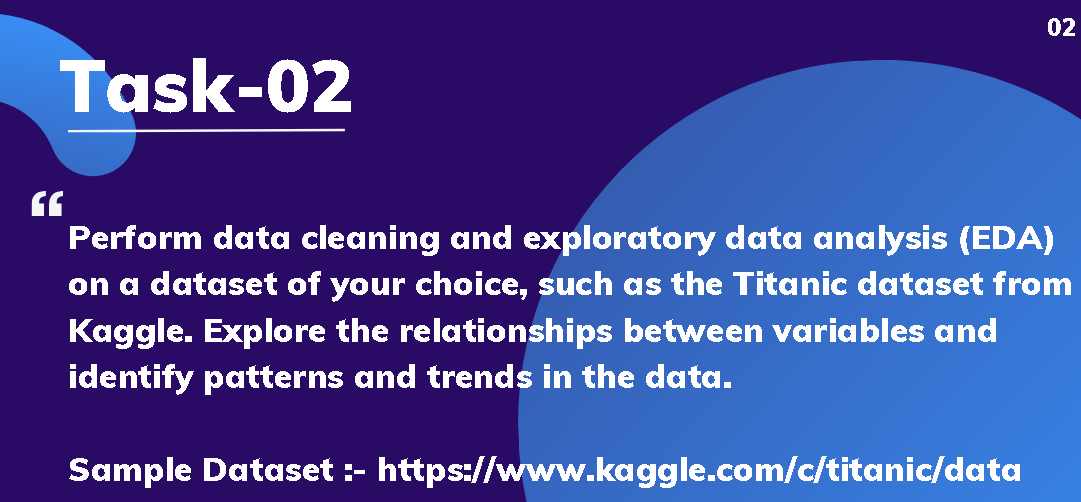

# **Dataset Description**
**Overview**

The data has been split into two groups:

training set (train.csv)

test set (test.csv)

**The training set** should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

**The test set** should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

**Data Dictionary**

**survival**	Survival	0 = No, 1 = Yes

**pclass**	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

**sex**	Sex

**Age**	Age in years

**sibsp** # of siblings / spouses aboard the Titanic

**parch**	# of parents / children aboard the Titanic

**ticket**	Ticket number

**fare**	Passenger fare

**cabin**	Cabin number

**embarked**	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

**Variable Notes**

**pclass:** A proxy for socio-economic status (SES)

1st = Upper

2nd = Middle

3rd = Lower

**age: **Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# **Basic Exploration**

In [ ]:
#importing necessary libraries.

import numpy as np  # Numerical calucations.

import pandas as pd # Manipulating dataset.

import matplotlib.pyplot as plt # Data visualization.

import seaborn as sns # Data visualization.

import warnings   # ignore warnings.
warnings.filterwarnings('ignore')

In [ ]:
# Read the csv files train,test and gender_submission respectively.
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
gs=pd.read_csv("gender_submission.csv")

In [ ]:
# print first 5 records.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gs.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
train.shape

(891, 12)

In [ ]:
test.shape

(418, 11)

In [ ]:
gs.shape

(418, 2)

In [ ]:
# informations of the datasets.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
gs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [ ]:
# Merge the test and gender_submission datasets by common feature.
test_gs=test.merge(gs,how="right")

In [ ]:
# information of merge dataset.
test_gs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [ ]:
# combine the train and test_gs data together.
combined_data = pd.concat([train,test_gs], ignore_index=True)

In [ ]:
# make a copy.
Titanic=combined_data.copy()

In [ ]:
Titanic.head() # first 5 records.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Data Cleaning**

In [ ]:
Titanic.info() # information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [ ]:
Titanic.describe(include="all") # descriptive statisticall information.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [ ]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
Titanic=Titanic.rename(columns={"Sex":"Gender"}) # changing feature name.

In [ ]:
Titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Gender', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# drop the duplicates.
Titanic=Titanic.drop_duplicates()

In [ ]:
# find the null values.
Titanic.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Gender            0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

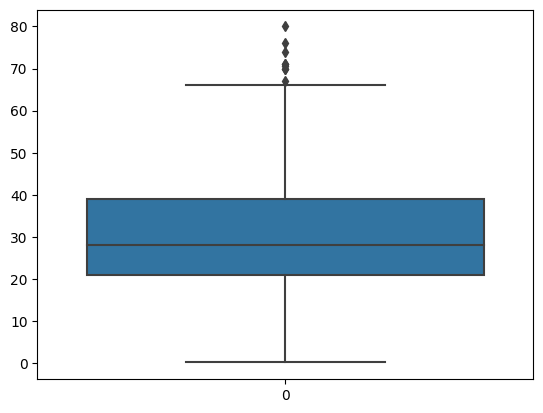

In [ ]:
sns.boxplot(Titanic['Age'])

<Axes: >

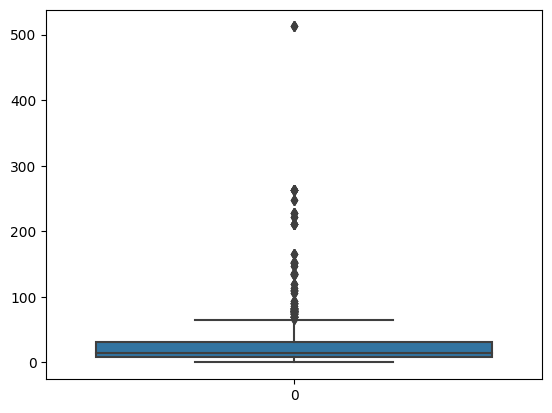

In [ ]:
sns.boxplot(Titanic['Fare'])

In [ ]:
Titanic['Age'].median()

28.0

In [ ]:
Titanic['Age']=Titanic['Age'].fillna(Titanic['Age'].median())

In [ ]:
Titanic['Cabin'].mode()

0    C23 C25 C27
Name: Cabin, dtype: object

In [ ]:
Titanic['Cabin']=Titanic['Cabin'].fillna("C23 C25 C27")

In [ ]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       2
dtype: int64

In [ ]:
Titanic['Fare'].median()

14.4542

In [ ]:
Titanic['Fare']=Titanic['Fare'].fillna(Titanic['Fare'].median())

In [ ]:
Titanic['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [ ]:
Titanic['Embarked']=Titanic['Embarked'].fillna("S")

In [ ]:
Titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Gender         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## **Dealing with Outliers**

<Axes: >

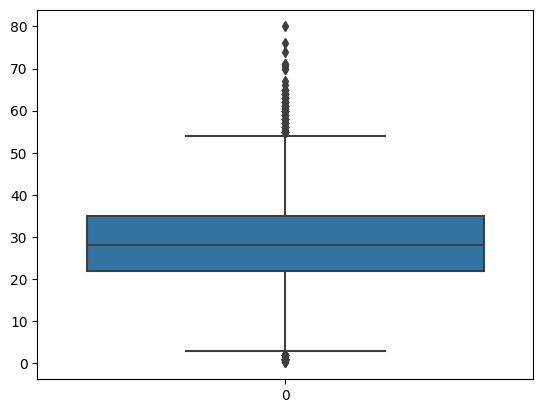

In [ ]:
sns.boxplot(Titanic['Age'])

In [ ]:
Q1=Titanic['Age'].quantile(0.25)
Q2=Titanic['Age'].quantile(0.50)
Q3=Titanic['Age'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

22.0
28.0
35.0
13.0


In [ ]:
u_l=Q3+1.5*IQR
l_l=Q1-1.5*IQR
print(u_l)
print(l_l)

54.5
2.5


In [ ]:
outliers=Titanic[(Titanic['Age']>u_l)|(Titanic['Age']<l_l)]
outliers.shape

(101, 12)

In [ ]:
Titanic['Age']=Titanic['Age'].clip(lower=l_l,upper=u_l)

<Axes: >

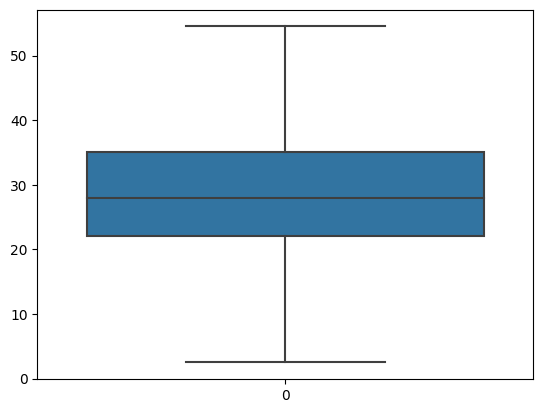

In [ ]:
sns.boxplot(Titanic['Age'])

<Axes: >

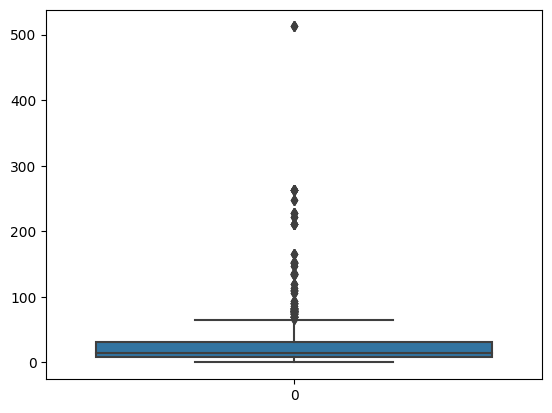

In [ ]:
sns.boxplot(Titanic['Fare'])

In [ ]:
Q1=Titanic['Fare'].quantile(0.25)
Q2=Titanic['Fare'].quantile(0.50)
Q3=Titanic['Fare'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

7.8958
14.4542
31.275
23.379199999999997


In [ ]:
u_l=Q3+1.5*IQR
l_l=Q1-1.5*IQR
print(u_l)
print(l_l)

66.34379999999999
-27.172999999999995


In [ ]:
outliers=Titanic[(Titanic['Fare']>u_l)|(Titanic['Fare']<l_l)]
outliers.shape

(171, 12)

In [ ]:
Titanic['Fare']=Titanic['Fare'].clip(lower=l_l,upper=u_l)

<Axes: >

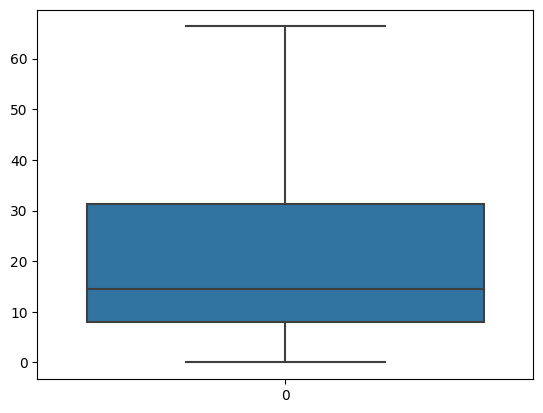

In [ ]:
sns.boxplot(Titanic['Fare'])

<Axes: >

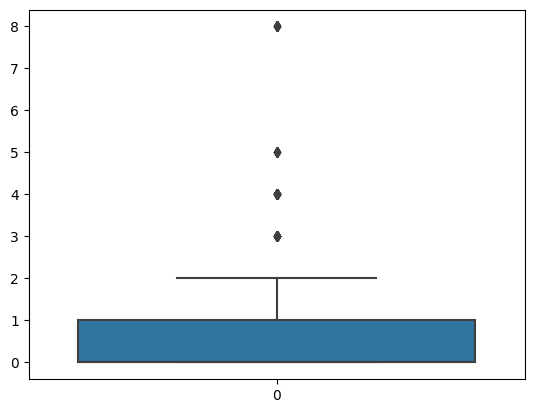

In [ ]:
sns.boxplot(Titanic['SibSp'])

In [ ]:
Q1=Titanic['SibSp'].quantile(0.25)
Q2=Titanic['SibSp'].quantile(0.50)
Q3=Titanic['SibSp'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

0.0
0.0
1.0
1.0


In [ ]:
u_l=Q3+1.5*IQR
l_l=Q1-1.5*IQR
print(u_l)
print(l_l)

2.5
-1.5


In [ ]:
outliers=Titanic[(Titanic['SibSp']>u_l)|(Titanic['SibSp']<l_l)]
outliers.shape

(57, 12)

In [ ]:
Titanic['SibSp']=Titanic['SibSp'].clip(lower=l_l,upper=u_l)

<Axes: >

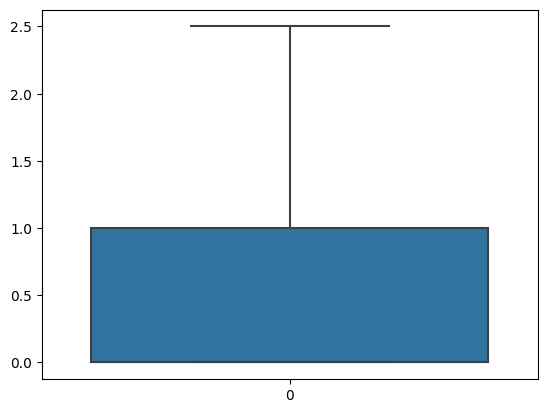

In [ ]:
sns.boxplot(Titanic['SibSp'])

From these Titanic dataset main importantant insite is that surivial of the people.So, we are analzing the data based on survival of the people with various features.

<Axes: xlabel='Gender', ylabel='Survived'>

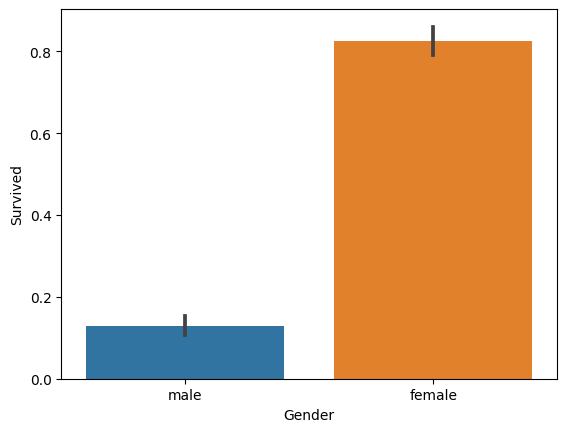

In [ ]:
sns.barplot(x=Titanic["Gender"],y=Titanic['Survived'])

<Axes: xlabel='Pclass', ylabel='Survived'>

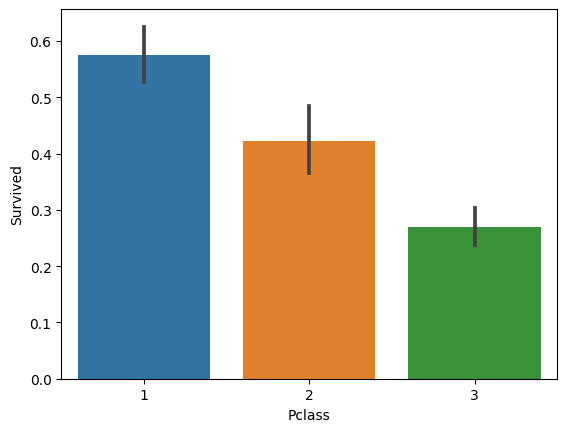

In [ ]:
sns.barplot(x=Titanic['Pclass'],y=Titanic['Survived'])

<Axes: xlabel='Embarked', ylabel='Survived'>

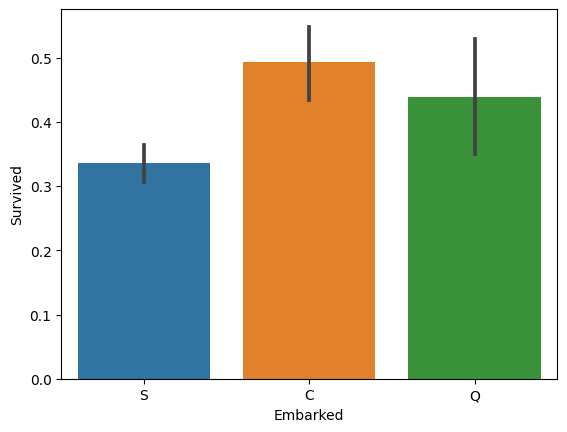

In [ ]:
sns.barplot(x=Titanic['Embarked'],y=Titanic['Survived'])

<Axes: xlabel='Parch', ylabel='Survived'>

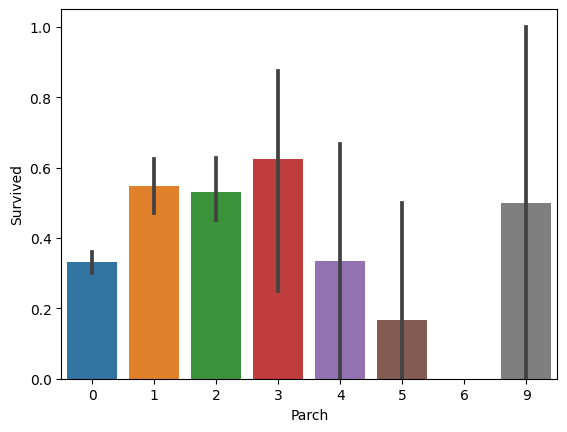

In [ ]:
sns.barplot(x=Titanic['Parch'],y=Titanic['Survived'])